In [23]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

from cube_fil_finder.galfa import galfa_util
%matplotlib inline

In [2]:
reload(galfa_util)

<module 'cube_fil_finder.galfa.galfa_util' from '/Users/larryli/Documents/CC/16-17/research/3d_filfind/cube_fil_finder/galfa/galfa_util.pyc'>

In [3]:
trees_path = '../../pickled_dicts/fourth_batch/all_trees_1_8.p'

In [4]:
trees_dict = pickle.load(open(trees_path, 'rb'))

In [17]:
short_trees = [k for k in trees_dict if trees_dict[k].length == 2]

In [18]:
short_trees[224]

'4261_1029_0'

In [19]:
ex_tree = trees_dict['4261_1029_0']

In [20]:
ex_data_padded = galfa_util.get_galfa_data_cube_from_tree(tree=ex_tree, pad_slices=2)

In [48]:
plot_data = ex_data_padded
plot_mask_data = ex_tree.getTreeMask()
plot_mask_corners = ex_tree.root_node.corners_original

In [62]:
def vis_channel_maps(plot_data, plot_mask_data, plot_mask_corners, key):
    fig, axs = plt.subplots(6, 1, figsize=(4, 24))

    min_val, max_val = np.min(plot_data), np.max(plot_data)
    min_cut, max_cut = np.percentile(plot_data, 5), np.percentile(plot_data, 95)

    ra, dec = galfa_util.galfa_index_to_radecs([plot_mask_corners[0][1], plot_mask_corners[1][1]],
                                               [plot_mask_corners[0][0], plot_mask_corners[1][0]])

    for i, ax in enumerate(axs):
        plot_data[i, 0, 0] = min_cut
        plot_data[i, 0, 1] = max_cut
        ax.imshow(plot_data[i].clip(min_cut, max_cut), origin='lower', cmap='binary')

        if i == 3 or i == 2:
            ax.contour(plot_mask_data, alpha=.5, colors='red', linewidths=.3)

        ax.set_xlabel('RA')
        ax.set_ylabel('DEC')

        ax.set_yticks([0, plot_mask_corners[1][0]-plot_mask_corners[0][0]])
        ax.set_yticklabels(np.round(dec,2))
        ax.set_xticks([0, plot_mask_corners[1][1]-plot_mask_corners[0][1]])
        ax.set_xticklabels(np.round(ra,2))
        ax.set_title('{0} ({1})'.format(key, i-2))

    fig.tight_layout()
    fig.show()

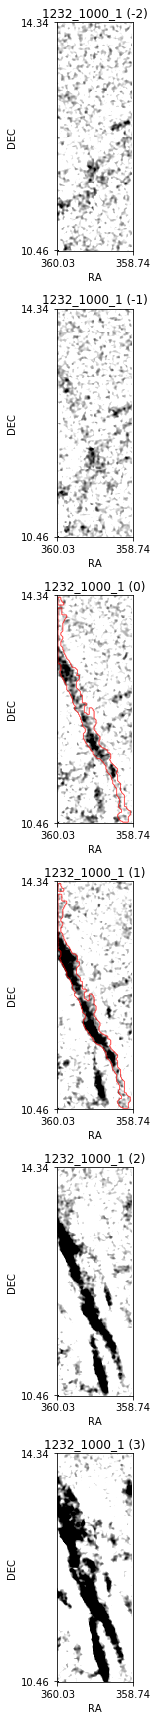

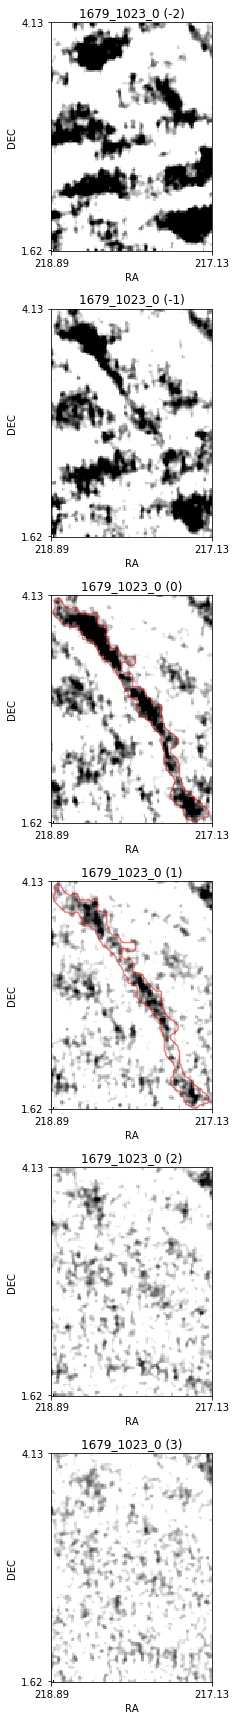

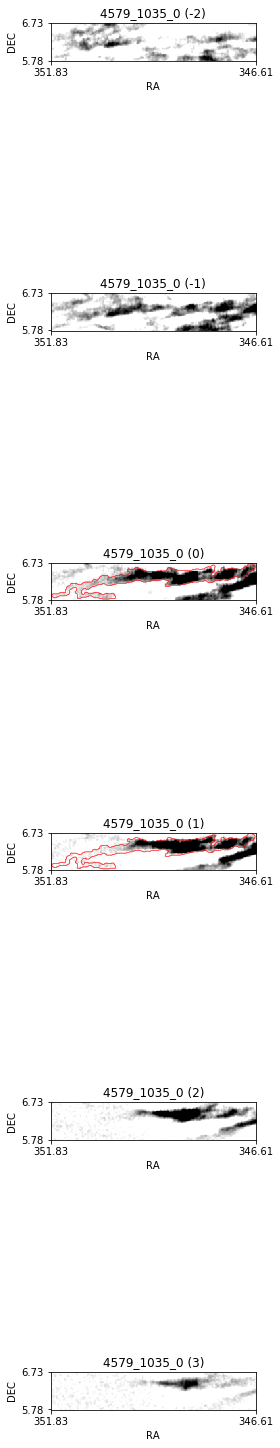

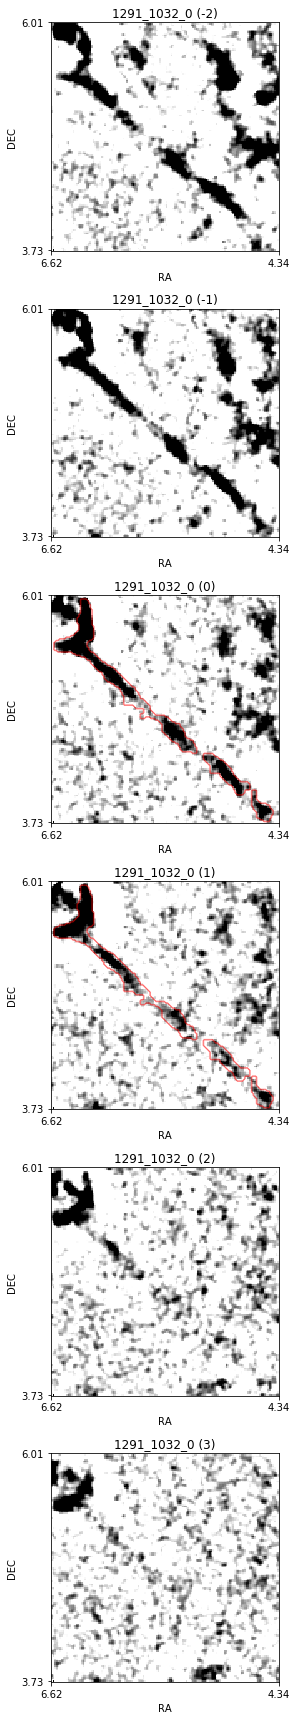

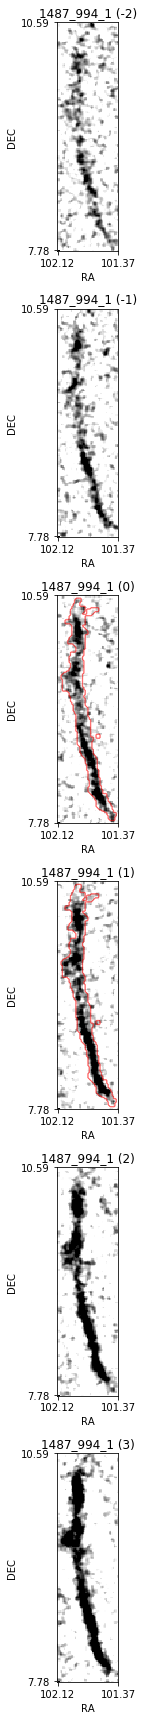

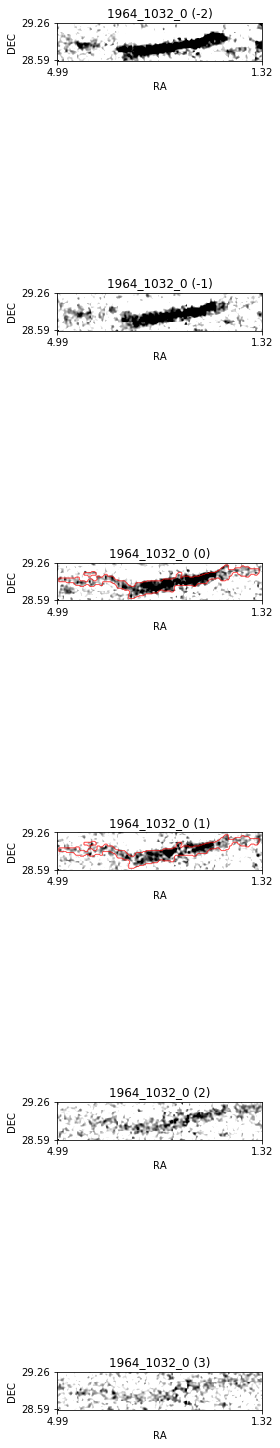

In [63]:
for i in [12,493,34,2,67,76]:
    key = short_trees[i]
    ex_tree = trees_dict[key]
    plot_data = galfa_util.get_galfa_data_cube_from_tree(tree=ex_tree, pad_slices=2)
    plot_mask_data = ex_tree.getTreeMask()
    plot_mask_corners = ex_tree.root_node.corners_original
    vis_channel_maps(plot_data, plot_mask_data, plot_mask_corners, key)